# *Gender Bias in Virtual Assistants Project*

### Identificando Preconceitos de Gênero em Assistentes Virtuais

![From Google](https://media-assets-01.thedrum.com/cache/images/thedrum-prod/s3-news-tmp-145694-untitled_design_70--default--1280.png)

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210


# *Gender Datasets* 

<center>
  <img width="600" src="https://drive.google.com/uc?id=11KlguWCUIDUzA8bN5dtzzab4tiY_2pz4"/>
</center>

---

### Descrição do MDGender *Dataset*

- ***Schema* dos dados:**

``` py
{
  "class_type": [
    0: "about",
    1: "partner",
    2: "self"
  ],
  "confidence": "string",
  "episode_done": "bool",
  "labels": [
    0: "ABOUT:female"
    1: "ABOUT:male",
    2: "PARTNER:female",
    3: "PARTNER:male",
    4: "SELF:female",
    5: "SELF:male"
  ],
  "original": "string",
  "text": "string",
  "turker_gender": [
    0: "man",
    1: "woman",
    2: "nonbinary",
    3: "prefer not to say",
    4: "no answer"
  ]
}
```

- **Sumário:** 
> - Possui 232 MB de tamanho
  - Campos do *schema* dos dados
    - `class_type` - dimensão da classificação
    - `confidence` - confiança do anotador em resposta ao rótulo do texto, sendo masculino ou feminino em relação às dimensões ABOUT/TO/AS
    - `episode_done` - valor que indica se a conversa foi concluída
    - `labels` - rótulo de classificação, com valores possíveis incluindo `ABOUT:female`, `ABOUT:male`, `PARTNER:female`, `PARTNER:male`, `SELF:female` e `SELF:male`.
    - `original` - texto antes da reformulação
    - `text` - texto a ser classificado
    - `turker_gender` - respota do anotador em relação a seu gênero

---

### Descrição do ConvAI2 *Dataset*

- ***Schema* dos dados:**

``` py
  { 
    # Anotação binária
    "binary_label": [ 
      0: "ABOUT:female",
      1: "ABOUT:male"
    ],
    "binary_score": "float32", # Score da anotação binária

    # Anotação considernado o gênero neutro
    "ternary_label": [ 
      0: "ABOUT:female",
      1: "ABOUT:male",
      2: "ABOUT:gender-neutral"
    ],
    "ternary_score": "float32", # Score da anotação ternária
    "text": "string"
  }
```

- **Sumário:** 
> - Possui 243 MB de tamanho
  - Campos do *schema* dos dados
    - `text` - o texto a ser classificado
    - `binary_label` - um rótulo de classificação, com valores possíveis incluindo `ABOUT:female` e `ABOUT:male`
    - `binary_score` - valor que indica uma pontuação entre 0 e 1
    - `ternary_label` - um rótulo de classificação, com valores possíveis incluindo `ABOUT:female`, `ABOUT:male` e `ABOUT:gender-neutral`
    - `ternary_score` - valor que indica uma pontuação entre 0 e 1

---

### Descrição do LIGHT *Dataset*

- ***Schema* dos dados:**
> *Mesmo esquema do ConvIA2.*

- **Sumário:** 
> - Possui 245 MB de tamanho
  - Campos do *schema* dos dados
    - `text` - o texto a ser classificado
    - `binary_label` - um rótulo de classificação, com valores possíveis incluindo `ABOUT:female` e `ABOUT:male`
    - `binary_score` - valor que indica uma pontuação entre 0 e 1
    - `ternary_label` - um rótulo de classificação, com valores possíveis incluindo `ABOUT:female`, `ABOUT:male` e `ABOUT:gender-neutral`
    - `ternary_score` - valor que indica uma pontuação entre 0 e 1



# Imports

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

import string
from spacy.lang.en import STOP_WORDS
from sklearn.preprocessing import OneHotEncoder

CMAP_ICEFIRE = plt.get_cmap('icefire')
DEFAULT_FONT_SIZE = 14
plt.rcParams['font.size'] = DEFAULT_FONT_SIZE

BASE_PATH = '.'
DATASETS_PATH = BASE_PATH + "/resources/datasets"

In [ ]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/modules')
import utils, text
from importlib import reload

# Leitura dos Dados

In [ ]:
md_gender_data = load_dataset('md_gender_bias', 'new_data', cache_dir = DATASETS_PATH + "/MDGender")
convai2_data = load_dataset('md_gender_bias', 'convai2_inferred', cache_dir = DATASETS_PATH + "/MDGender")
light_data = load_dataset('md_gender_bias', 'light_inferred', cache_dir = DATASETS_PATH + "/MDGender")

df_md_gender = pd.DataFrame(md_gender_data['train'])
df_convai2 = pd.DataFrame(convai2_data['train'])
df_light = pd.DataFrame(light_data['train'])

Reusing dataset md_gender_bias (/content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Datasets/MDGender/md_gender_bias/new_data/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224)
Reusing dataset md_gender_bias (/content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Datasets/MDGender/md_gender_bias/convai2_inferred/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224)
Reusing dataset md_gender_bias (/content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Datasets/MDGender/md_gender_bias/light_inferred/1.0.0/01dacda3d3a362db704fa0485596d225bb3790186f7ab7625fa9f81c6402f224)


In [ ]:
print('-------------------- MDGENDER -------------------')
print('Número de instâncias = {}'.format(len(df_md_gender)))
print('Número de atributos = {}'.format(len(df_md_gender.columns)))

print('\n-------------------- CONVAI2 --------------------')
print('Número de instâncias = {}'.format(len(df_convai2)))
print('Número de atributos = {}'.format(len(df_convai2.columns)))

print('\n--------------------- LIGHT ---------------------')
print('Número de instâncias = {}'.format(len(df_light)))
print('Número de atributos = {}'.format(len(df_light.columns)))

-------------------- MDGENDER -------------------
Número de instâncias = 2345
Número de atributos = 7

-------------------- CONVAI2 --------------------
Número de instâncias = 131438
Número de atributos = 5

--------------------- LIGHT ---------------------
Número de instâncias = 106122
Número de atributos = 5


In [ ]:
print('-------------------- MDGENDER -------------------')
# Transformando a coluna labels em valores inteiros
df_md_gender['labels'] = df_md_gender['labels'].apply(lambda x: x[0])
# Selecionando os textos que possuem apenas um valor de confidence como certain e pretty sure
df_md_gender = df_md_gender[df_md_gender['confidence'] != 'unsure']

dups = df_md_gender.duplicated()
print('Número de linhas duplicadas = {}'.format(dups.sum()))
print('Número de instâncias = {}'.format(len(df_md_gender)))
# Excluindo as linhas duplicadas
df_md_gender.drop_duplicates(inplace=True)
print('Número de instâncias após a remoção = {}'.format(len(df_md_gender)))

print('\n-------------------- CONVAI2 --------------------')
dups = df_convai2.duplicated()
print('Número de linhas duplicadas = {}'.format(dups.sum()))
print('Número de instâncias = {}'.format(len(df_convai2)))
# Excluindo as linhas duplicadas
df_convai2.drop_duplicates(inplace=True)
print('Número de instâncias após a remoção = {}'.format(len(df_convai2)))

print('\n--------------------- LIGHT ---------------------')
dups = df_light.duplicated()
print('Número de linhas duplicadas = {}'.format(dups.sum()))
print('Número de instâncias = {}'.format(len(df_light)))
# Excluindo as linhas duplicadas
df_light.drop_duplicates(inplace=True)
print('Número de instâncias após a remoção = {}'.format(len(df_light)))

-------------------- MDGENDER -------------------
Número de linhas duplicadas = 0
Número de instâncias = 2292
Número de instâncias após a remoção = 2292

-------------------- CONVAI2 --------------------
Número de linhas duplicadas = 15560
Número de instâncias = 131438
Número de instâncias após a remoção = 115878

--------------------- LIGHT ---------------------
Número de linhas duplicadas = 1497
Número de instâncias = 106122
Número de instâncias após a remoção = 104625


# Pré-Processamento dos Dados

Como já realizamos uma análise exploratória de todos os ***gender datasets*** e guardamos algumas informações especificamente para a etapa de pré-processamento, executaremos os seguintes passos para treinamento e avaliação dos modelos com os conjuntos de dados de gênero: 

1. Limpeza dos dados e remoção das *stopwords*
2. Seleção de uma *sample* para treino e avaliação com base em um *threshold* 
3. Vetorização das classes com *one-hot encoding*



## Limpeza dos Dados e Remoção das *Stopwords*

Como todos os dados de gênero estão balanceados, partiremos logo para a etapa de normalização/limpeza dos dados. Nesta etapa, iremos repetir o que foi feito nos *notebooks* de EDA.

### MD*Gender*

In [ ]:
df_md_gender['text_tokens'] = df_md_gender['text'].apply(lambda r: r.translate(str.maketrans('', '', string.punctuation)).lower().split()) 
df_md_gender['clean_text'] = df_md_gender['text_tokens'].apply(lambda x: ' '.join(x))
df_md_gender['text_tokens_count'] = df_md_gender['text_tokens'].apply(lambda r: len(r)) # Quantidade de tokens de cada texto

md_gender_all_tokens = df_md_gender['text_tokens'].explode() 
md_gender_all_clean_tokens = [token for token in md_gender_all_tokens if token not in STOP_WORDS]

md_gender_most_common_clean_tokens = utils.make_most_common_words(md_gender_all_clean_tokens, n_most_common=50)
md_gender_words2ignore = [tup[0] for tup in md_gender_most_common_clean_tokens if tup[1] > 20000] # Valor que estava no notebook de EDA
md_gender_set_stop_words2ignore = STOP_WORDS.union(set(md_gender_words2ignore))

df_md_gender['text_tokens'] = df_md_gender['text_tokens'].apply(lambda x: text.remove_potencial_stopwords(x, words2ignore=md_gender_set_stop_words2ignore))
df_md_gender['clean_text_words2ignore'] = df_md_gender['text_tokens'].apply(lambda x: ' '.join(x))

df_md_gender.head()

,text,original,labels,class_type,turker_gender,episode_done,confidence,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore
0,He designed monumental Lovissa War Cemetery in...,She designed monumental Loviisa war cemetery ...,1,0,4,True,certain,"[designed, monumental, lovissa, war, cemetery,...",he designed monumental lovissa war cemetery in...,8,designed monumental lovissa war cemetery 1920
1,She works as a volunteer firefighter.,I work as a volunteer firefighter.,4,2,4,True,certain,"[works, volunteer, firefighter]",she works as a volunteer firefighter,6,works volunteer firefighter
2,She participated in the FIVB volleyball grand ...,She participated in the FIVB volleyball grand ...,0,0,4,True,certain,"[participated, fivb, volleyball, grand, champi...",she participated in the fivb volleyball grand ...,11,participated fivb volleyball grand champions c...
3,Correct ! Walter Havighurst was an author of m...,Correct! Walter Havighurst was an author of ma...,1,0,4,True,certain,"[correct, walter, havighurst, author, books, l...",correct walter havighurst was an author of man...,19,correct walter havighurst author books loved b...
4,"Yes, she released only one album with them, ""w...","yes, He released only one album with them, ""Wo...",0,0,4,True,certain,"[yes, released, album, wołanie, o, słońce, nad...",yes she released only one album with them woła...,13,yes released album wołanie o słońce nad światem


In [ ]:
print('Estatísticas básicas da contagem de tokens dos comentários =\n{}\n'.format(df_md_gender['text_tokens_count'].describe()))

# Todos os tokens dos comentários
md_gender_all_tokens = df_md_gender['text_tokens'].explode() 

print('Quantidade de palavras de todos os comentários = {}'.format(len(list(md_gender_all_tokens))))
print('Quantidade de palavras ÚNICAS de todos os comentários = {}'.format(len(set(md_gender_all_tokens))))

Estatísticas básicas da contagem de tokens dos comentários =
count    2292.000000
mean       11.769634
std         4.253448
min         4.000000
25%         9.000000
50%        11.000000
75%        14.000000
max        32.000000
Name: text_tokens_count, dtype: float64

Quantidade de palavras de todos os comentários = 12130
Quantidade de palavras ÚNICAS de todos os comentários = 2580


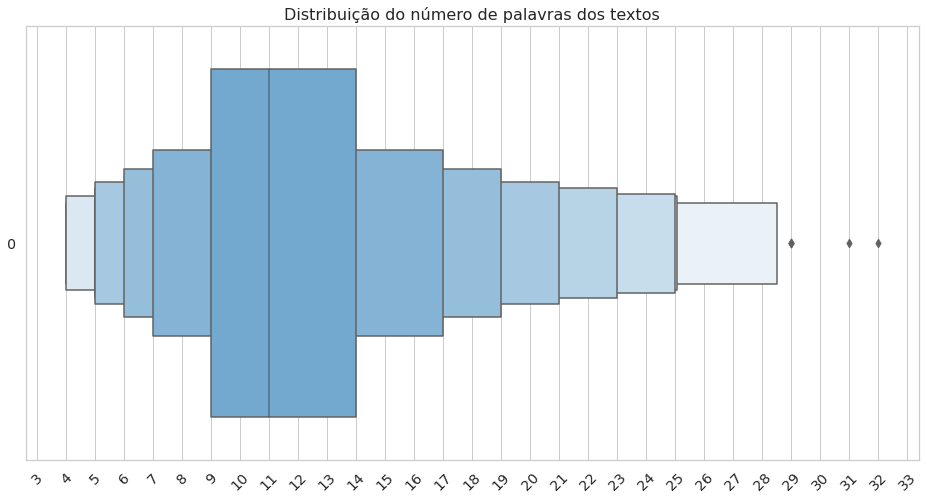

In [ ]:
utils.plot_distribution_large_data(df_md_gender['text_tokens_count'], 
                                   title='Distribuição do número de palavras dos textos', 
                                   xaxis_interval=1)

### ConvIA2

In [ ]:
df_convai2['text_tokens'] = df_convai2['text'].apply(lambda r: r.translate(str.maketrans('', '', string.punctuation)).lower().split()) 
df_convai2['clean_text'] = df_convai2['text_tokens'].apply(lambda x: ' '.join(x))
df_convai2['text_tokens_count'] = df_convai2['text_tokens'].apply(lambda r: len(r)) # Quantidade de tokens de cada texto

convai2_all_tokens = df_convai2['text_tokens'].explode() 
convai2_all_clean_tokens = [token for token in convai2_all_tokens if token not in STOP_WORDS]

convai2_most_common_clean_tokens = utils.make_most_common_words(convai2_all_clean_tokens, n_most_common=50)
convai2_words2ignore = [tup[0] for tup in convai2_most_common_clean_tokens if tup[1] > 20000] # Valor que estava no notebook de EDA
convai2_set_stop_words2ignore = STOP_WORDS.union(set(convai2_words2ignore))

df_convai2['text_tokens'] = df_convai2['text_tokens'].apply(lambda x: utils.remove_potencial_stopwords(x, words2ignore=convai2_set_stop_words2ignore))
df_convai2['clean_text_words2ignore'] = df_convai2['text_tokens'].apply(lambda x: ' '.join(x))

df_convai2.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore
0,"hi , how are you doing ? i'm getting ready to ...",1,0.6522,2,0.4496,"[hi, im, getting, ready, cheetah, chasing, sta...",hi how are you doing im getting ready to do so...,17,hi im getting ready cheetah chasing stay shape
1,i am ! for my hobby i like to do canning or so...,1,0.6505,2,0.8413,"[hobby, like, canning, whittling]",i am for my hobby i like to do canning or some...,13,hobby like canning whittling
2,that's neat . when i was in high school i plac...,1,0.8615,1,0.5290,"[thats, neat, high, school, placed, 6th, 100m,...",thats neat when i was in high school i placed ...,14,thats neat high school placed 6th 100m dash
3,i do not . but i do have a favorite meat since...,0,0.6487,2,0.5111,"[favorite, meat, eat, exclusively]",i do not but i do have a favorite meat since t...,17,favorite meat eat exclusively
4,i would have to say its prime rib . do you hav...,0,0.5697,2,0.5346,"[prime, rib, favorite, foods]",i would have to say its prime rib do you have ...,14,prime rib favorite foods


In [ ]:
print('Estatísticas básicas da contagem de tokens dos comentários =\n{}\n'.format(df_convai2['text_tokens_count'].describe()))

# Todos os tokens dos comentários
convai2_all_tokens = df_convai2['text_tokens'].explode() 

print('Quantidade de palavras de todos os comentários = {}'.format(len(list(convai2_all_tokens))))
print('Quantidade de palavras ÚNICAS de todos os comentários = {}'.format(len(set(convai2_all_tokens))))

Estatísticas básicas da contagem de tokens dos comentários =
count    115878.000000
mean         10.153316
std           3.343498
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          20.000000
Name: text_tokens_count, dtype: float64

Quantidade de palavras de todos os comentários = 518576
Quantidade de palavras ÚNICAS de todos os comentários = 17783


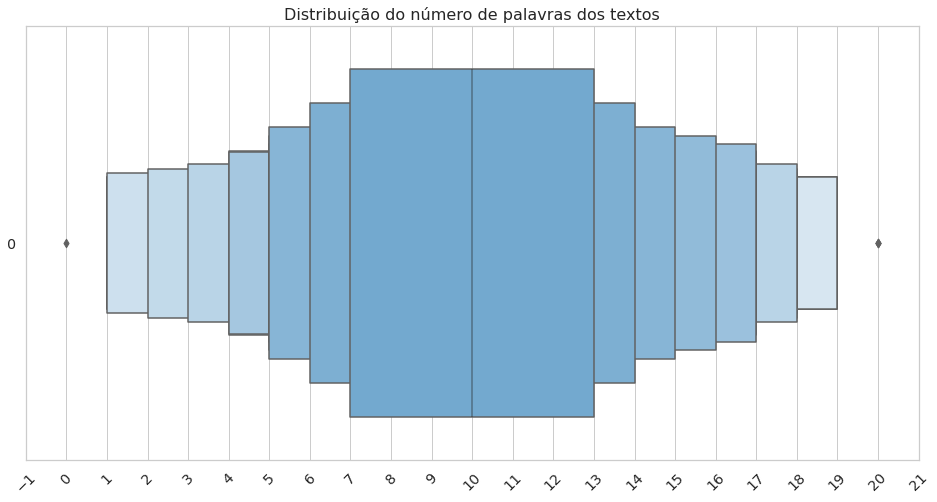

In [ ]:
utils.plot_distribution_large_data(df_convai2['text_tokens_count'], 
                                   title='Distribuição do número de palavras dos textos', 
                                   xaxis_interval=1)

### LIGHT

In [ ]:
df_light['text_tokens'] = df_light['text'].apply(lambda r: r.translate(str.maketrans('', '', string.punctuation)).lower().split()) 
df_light['clean_text'] = df_light['text_tokens'].apply(lambda x: ' '.join(x))
df_light['text_tokens_count'] = df_light['text_tokens'].apply(lambda r: len(r)) # Quantidade de tokens de cada texto

light_all_tokens = df_light['text_tokens'].explode() 
light_all_clean_tokens = [token for token in light_all_tokens if token not in STOP_WORDS]

light_most_common_clean_tokens = utils.make_most_common_words(light_all_clean_tokens, n_most_common=50)
light_words2ignore = [tup[0] for tup in light_most_common_clean_tokens if tup[1] > 20000] # Valor que estava no notebook de EDA
light_set_stop_words2ignore = STOP_WORDS.union(set(light_words2ignore))

df_light['text_tokens'] = df_light['text_tokens'].apply(lambda x: utils.remove_potencial_stopwords(x, words2ignore=light_set_stop_words2ignore))
df_light['clean_text_words2ignore'] = df_light['text_tokens'].apply(lambda x: ' '.join(x))

df_light.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore
0,hello,0,0.5660,2,0.3920,[hello],hello,1,hello
1,"what brings you here, dear?",0,0.5897,0,0.4741,"[brings, dear]",what brings you here dear,5,brings dear
2,"oh goddess of the forest, we seek thy blessings!",0,0.7413,2,0.5145,"[oh, goddess, forest, seek, thy, blessings]",oh goddess of the forest we seek thy blessings,9,oh goddess forest seek thy blessings
3,"time to rest, we can leave the launching point...",1,0.6374,2,0.5910,"[time, rest, leave, launching, point, tomorrow]",time to rest we can leave the launching point ...,10,time rest leave launching point tomorrow
4,-tweets a song-,0,0.5460,1,0.4366,"[tweets, song]",tweets a song,3,tweets song


In [ ]:
print('Estatísticas básicas da contagem de tokens dos comentários =\n{}\n'.format(df_light['text_tokens_count'].describe()))

# Todos os tokens dos comentários
light_all_tokens = df_light['text_tokens'].explode() 

print('Quantidade de palavras de todos os comentários = {}'.format(len(list(light_all_tokens))))
print('Quantidade de palavras ÚNICAS de todos os comentários = {}'.format(len(set(light_all_tokens))))

Estatísticas básicas da contagem de tokens dos comentários =
count    104625.000000
mean         15.181945
std           9.716477
min           0.000000
25%           8.000000
50%          13.000000
75%          20.000000
max         131.000000
Name: text_tokens_count, dtype: float64

Quantidade de palavras de todos os comentários = 611503
Quantidade de palavras ÚNICAS de todos os comentários = 29276


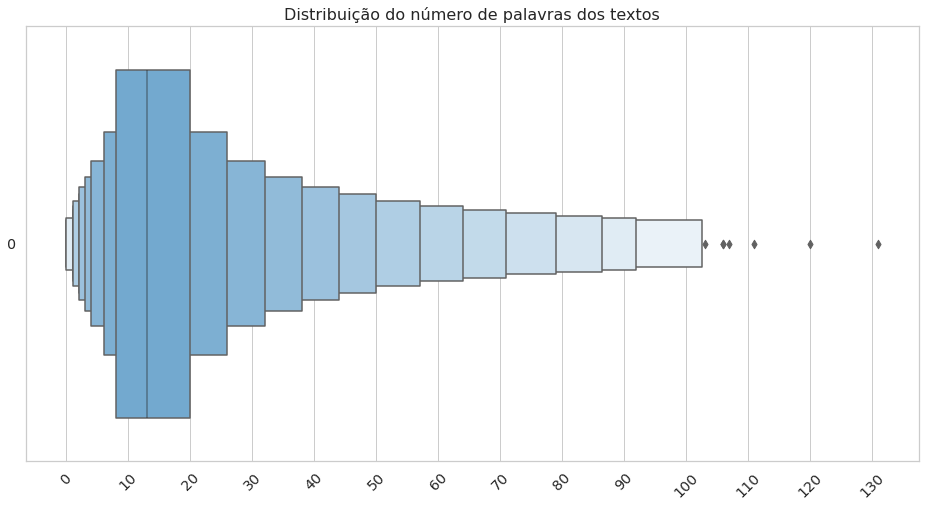

In [ ]:
utils.plot_distribution_large_data(df_light['text_tokens_count'], 
                                   title='Distribuição do número de palavras dos textos', 
                                   xaxis_interval=10)

## *Sample* Final dos Dados

Aqui, iremos selecionar uma *sample* final dos conjuntos de dados. Como o intuito final do presente trabalho consiste em unir as predições de dois modelos diferentes (um para identificação de viés de gênero e outro para toxicidade), precisamos escolher um valor de *threshold* para o tamanho dos textos. Nossos modelos precisam receber textos que possuam uma quantidade de palavras proporcional.

- Valor do *threshold* = até 60 palavras

In [ ]:
print('-------------------- MDGENDER -------------------')
print('Número de instâncias = {}'.format(len(df_md_gender)))
df_md_gender = df_md_gender[df_md_gender['text_tokens_count'] > 1] # Retirando textos que possuem apenas uma palavra (ou nenhuma)
df_md_gender = df_md_gender[df_md_gender['text_tokens_count'] <= text.MAX_LENGTH]
print('Número de instâncias após a remoção = {}'.format(len(df_md_gender)))

print('\n-------------------- CONVAI2 --------------------')
print('Número de instâncias = {}'.format(len(df_convai2)))
df_convai2 = df_convai2[df_convai2['text_tokens_count'] > 1] # Retirando textos que possuem apenas uma palavra (ou nenhuma)
df_convai2 = df_convai2[df_convai2['text_tokens_count'] <= text.MAX_LENGTH]
print('Número de instâncias após a remoção = {}'.format(len(df_convai2)))


print('\n--------------------- LIGHT ---------------------')
print('Número de instâncias = {}'.format(len(df_light)))
df_light = df_light[df_light['text_tokens_count'] > 1] # Retirando textos que possuem apenas uma palavra (ou nenhuma)
df_light = df_light[df_light['text_tokens_count'] <= text.MAX_LENGTH]
print('Número de instâncias após a remoção = {}'.format(len(df_light)))

-------------------- MDGENDER -------------------
Número de instâncias = 2292
Número de instâncias após a remoção = 2292

-------------------- CONVAI2 --------------------
Número de instâncias = 115878
Número de instâncias após a remoção = 115809

--------------------- LIGHT ---------------------
Número de instâncias = 104625
Número de instâncias após a remoção = 103601


## *One-hot Encoding* das Classes

Como as nossas classes são categóricas, iremos aplicar a técnica de *one-hot encoding* [[1](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)].

In [ ]:
binary_labels = ['male', 'female']
ternary_labels = ['male', 'female', 'neutral']

enc = OneHotEncoder(sparse=False)

### MD*Gender*

In [ ]:
FEMALE = [0, 2, 4]
MALE = [1, 3, 5]

def change_column_labels(row):
  if row in FEMALE:
    return 'female'
  else:
    return 'male'

In [ ]:
df_md_gender['labels'] = df_md_gender['labels'].apply(change_column_labels)

df_md_gender.head()

,text,original,labels,class_type,turker_gender,episode_done,confidence,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore
0,He designed monumental Lovissa War Cemetery in...,She designed monumental Loviisa war cemetery ...,male,0,4,True,certain,"[designed, monumental, lovissa, war, cemetery,...",he designed monumental lovissa war cemetery in...,8,designed monumental lovissa war cemetery 1920
1,She works as a volunteer firefighter.,I work as a volunteer firefighter.,female,2,4,True,certain,"[works, volunteer, firefighter]",she works as a volunteer firefighter,6,works volunteer firefighter
2,She participated in the FIVB volleyball grand ...,She participated in the FIVB volleyball grand ...,female,0,4,True,certain,"[participated, fivb, volleyball, grand, champi...",she participated in the fivb volleyball grand ...,11,participated fivb volleyball grand champions c...
3,Correct ! Walter Havighurst was an author of m...,Correct! Walter Havighurst was an author of ma...,male,0,4,True,certain,"[correct, walter, havighurst, author, books, l...",correct walter havighurst was an author of man...,19,correct walter havighurst author books loved b...
4,"Yes, she released only one album with them, ""w...","yes, He released only one album with them, ""Wo...",female,0,4,True,certain,"[yes, released, album, wołanie, o, słońce, nad...",yes she released only one album with them woła...,13,yes released album wołanie o słońce nad światem


In [ ]:
df_md_gender['labels_enc'] = df_md_gender['labels'].astype('category').cat.codes.astype(int) 
df_md_gender_enc_labels = pd.DataFrame(enc.fit_transform(df_md_gender[['labels']])) 

df_md_gender = pd.concat([df_md_gender.reset_index(drop=True), df_md_gender_enc_labels.reset_index(drop=True)], axis=1)
df_md_gender.rename(columns={
    0: 'label_pos_0', # Female
    1: 'label_pos_1', # Male
}, inplace=True)

df_md_gender.head()

,text,original,labels,class_type,turker_gender,episode_done,confidence,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore,labels_enc,label_pos_0,label_pos_1
0,He designed monumental Lovissa War Cemetery in...,She designed monumental Loviisa war cemetery ...,male,0,4,True,certain,"[designed, monumental, lovissa, war, cemetery,...",he designed monumental lovissa war cemetery in...,8,designed monumental lovissa war cemetery 1920,1,0.0,1.0
1,She works as a volunteer firefighter.,I work as a volunteer firefighter.,female,2,4,True,certain,"[works, volunteer, firefighter]",she works as a volunteer firefighter,6,works volunteer firefighter,0,1.0,0.0
2,She participated in the FIVB volleyball grand ...,She participated in the FIVB volleyball grand ...,female,0,4,True,certain,"[participated, fivb, volleyball, grand, champi...",she participated in the fivb volleyball grand ...,11,participated fivb volleyball grand champions c...,0,1.0,0.0
3,Correct ! Walter Havighurst was an author of m...,Correct! Walter Havighurst was an author of ma...,male,0,4,True,certain,"[correct, walter, havighurst, author, books, l...",correct walter havighurst was an author of man...,19,correct walter havighurst author books loved b...,1,0.0,1.0
4,"Yes, she released only one album with them, ""w...","yes, He released only one album with them, ""Wo...",female,0,4,True,certain,"[yes, released, album, wołanie, o, słońce, nad...",yes she released only one album with them woła...,13,yes released album wołanie o słońce nad światem,0,1.0,0.0


In [ ]:
df_md_gender.to_csv('/content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Datasets/MDGender/md_gender_bias/new_data/new_data.csv', index=False)

### ConvAI2

In [ ]:
df_convai2.update(df_convai2.loc[:, 'ternary_label'].replace({k: v for k, v in enumerate(ternary_labels)}))

df_convai2.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore
0,"hi , how are you doing ? i'm getting ready to ...",1,0.6522,neutral,0.4496,"[hi, im, getting, ready, cheetah, chasing, sta...",hi how are you doing im getting ready to do so...,17,hi im getting ready cheetah chasing stay shape
1,i am ! for my hobby i like to do canning or so...,1,0.6505,neutral,0.8413,"[hobby, like, canning, whittling]",i am for my hobby i like to do canning or some...,13,hobby like canning whittling
2,that's neat . when i was in high school i plac...,1,0.8615,female,0.5290,"[thats, neat, high, school, placed, 6th, 100m,...",thats neat when i was in high school i placed ...,14,thats neat high school placed 6th 100m dash
3,i do not . but i do have a favorite meat since...,0,0.6487,neutral,0.5111,"[favorite, meat, eat, exclusively]",i do not but i do have a favorite meat since t...,17,favorite meat eat exclusively
4,i would have to say its prime rib . do you hav...,0,0.5697,neutral,0.5346,"[prime, rib, favorite, foods]",i would have to say its prime rib do you have ...,14,prime rib favorite foods


In [ ]:
df_convai2['labels_enc'] = df_convai2['ternary_label'].astype('category').cat.codes.astype(int) 
df_convai2_enc_labels = pd.DataFrame(enc.fit_transform(df_convai2[['ternary_label']])) 

df_convai2 = pd.concat([df_convai2.reset_index(drop=True), df_convai2_enc_labels.reset_index(drop=True)], axis=1)
df_convai2.rename(columns={
    0: 'label_pos_0', # Female
    1: 'label_pos_1', # Male
    2: 'label_pos_2' # Neutral
}, inplace=True)

df_convai2.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore,labels_enc,label_pos_0,label_pos_1,label_pos_2
0,"hi , how are you doing ? i'm getting ready to ...",1,0.6522,neutral,0.4496,"[hi, im, getting, ready, cheetah, chasing, sta...",hi how are you doing im getting ready to do so...,17,hi im getting ready cheetah chasing stay shape,2,0.0,0.0,1.0
1,i am ! for my hobby i like to do canning or so...,1,0.6505,neutral,0.8413,"[hobby, like, canning, whittling]",i am for my hobby i like to do canning or some...,13,hobby like canning whittling,2,0.0,0.0,1.0
2,that's neat . when i was in high school i plac...,1,0.8615,female,0.5290,"[thats, neat, high, school, placed, 6th, 100m,...",thats neat when i was in high school i placed ...,14,thats neat high school placed 6th 100m dash,0,1.0,0.0,0.0
3,i do not . but i do have a favorite meat since...,0,0.6487,neutral,0.5111,"[favorite, meat, eat, exclusively]",i do not but i do have a favorite meat since t...,17,favorite meat eat exclusively,2,0.0,0.0,1.0
4,i would have to say its prime rib . do you hav...,0,0.5697,neutral,0.5346,"[prime, rib, favorite, foods]",i would have to say its prime rib do you have ...,14,prime rib favorite foods,2,0.0,0.0,1.0


In [ ]:
df_convai2.to_csv('/content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Datasets/MDGender/md_gender_bias/convai2_inferred/new_data.csv', index=False)

### LIGHT

In [ ]:
df_light.update(df_light.loc[:, 'ternary_label'].replace({k: v for k, v in enumerate(ternary_labels)}))

df_light.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore
1,"what brings you here, dear?",0,0.5897,male,0.4741,"[brings, dear]",what brings you here dear,5,brings dear
2,"oh goddess of the forest, we seek thy blessings!",0,0.7413,neutral,0.5145,"[oh, goddess, forest, seek, thy, blessings]",oh goddess of the forest we seek thy blessings,9,oh goddess forest seek thy blessings
3,"time to rest, we can leave the launching point...",1,0.6374,neutral,0.5910,"[time, rest, leave, launching, point, tomorrow]",time to rest we can leave the launching point ...,10,time rest leave launching point tomorrow
4,-tweets a song-,0,0.5460,female,0.4366,"[tweets, song]",tweets a song,3,tweets song
5,hello! what are you looking shopping for?,0,0.5989,male,0.4476,"[hello, looking, shopping]",hello what are you looking shopping for,7,hello looking shopping


In [ ]:
df_light['labels_enc'] = df_light['ternary_label'].astype('category').cat.codes.astype(int) 
df_light_enc_labels = pd.DataFrame(enc.fit_transform(df_light[['ternary_label']])) 

df_light = pd.concat([df_light.reset_index(drop=True), df_light_enc_labels.reset_index(drop=True)], axis=1)
df_light.rename(columns={
    0: 'label_pos_0', # Female
    1: 'label_pos_1', # Male
    2: 'label_pos_2' # Neutral
}, inplace=True)

df_light.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore,labels_enc,label_pos_0,label_pos_1,label_pos_2
0,"what brings you here, dear?",0,0.5897,male,0.4741,"[brings, dear]",what brings you here dear,5,brings dear,1,0.0,1.0,0.0
1,"oh goddess of the forest, we seek thy blessings!",0,0.7413,neutral,0.5145,"[oh, goddess, forest, seek, thy, blessings]",oh goddess of the forest we seek thy blessings,9,oh goddess forest seek thy blessings,2,0.0,0.0,1.0
2,"time to rest, we can leave the launching point...",1,0.6374,neutral,0.5910,"[time, rest, leave, launching, point, tomorrow]",time to rest we can leave the launching point ...,10,time rest leave launching point tomorrow,2,0.0,0.0,1.0
3,-tweets a song-,0,0.5460,female,0.4366,"[tweets, song]",tweets a song,3,tweets song,0,1.0,0.0,0.0
4,hello! what are you looking shopping for?,0,0.5989,male,0.4476,"[hello, looking, shopping]",hello what are you looking shopping for,7,hello looking shopping,1,0.0,1.0,0.0


In [ ]:
df_light.to_csv(BASE_PATH + '/resources/datasets/MDGender/md_gender_bias/light_inferred/new_data.csv', index=False)

# Observações 

*Só isso de pré-processamento? E a representação textual? Fica assim mesmo?*

Paciência, gafanhoto. Quem espera sempre alcança! 

Os textos ainda precisam passar por algumas mudanças para serem usados como entrada para os modelos. Este passo será feito na etapa de treinamento ;)

# Referência

[[1](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)] Why One-Hot Encode Data in Machine Learning?. 2020. Machine Learning Mastery. Jason Brownlee.
 